# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

100%|██████████| 170498071/170498071 [00:27<00:00, 6301562.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.300
[epoch: 0, i:  1499] avg mini-batch loss: 2.296
[epoch: 0, i:  1999] avg mini-batch loss: 2.281
[epoch: 0, i:  2499] avg mini-batch loss: 2.231
[epoch: 0, i:  2999] avg mini-batch loss: 2.125
[epoch: 0, i:  3499] avg mini-batch loss: 1.993
[epoch: 0, i:  3999] avg mini-batch loss: 1.881
[epoch: 0, i:  4499] avg mini-batch loss: 1.807
[epoch: 0, i:  4999] avg mini-batch loss: 1.743
[epoch: 1, i:   499] avg mini-batch loss: 1.706
[epoch: 1, i:   999] avg mini-batch loss: 1.640
[epoch: 1, i:  1499] avg mini-batch loss: 1.633
[epoch: 1, i:  1999] avg mini-batch loss: 1.614
[epoch: 1, i:  2499] avg mini-batch loss: 1.571
[epoch: 1, i:  2999] avg mini-batch loss: 1.574
[epoch: 1, i:  3499] avg mini-batch loss: 1.524
[epoch: 1, i:  3999] avg mini-batch loss: 1.511
[epoch: 1, i:  4499] avg mini-batch loss: 1.496
[epoch: 1, i:  4999] 

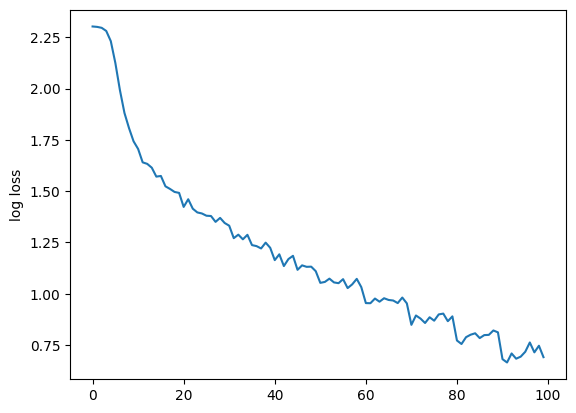

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 64.57000000000001 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.016259
Train Epoch: 2 	Loss: 0.010553
Train Epoch: 3 	Loss: 0.007171
Train Epoch: 4 	Loss: 0.005046
Train Epoch: 5 	Loss: 0.003773
Train Epoch: 6 	Loss: 0.002923
Train Epoch: 7 	Loss: 0.002394
Train Epoch: 8 	Loss: 0.002047
Train Epoch: 9 	Loss: 0.001780
Train Epoch: 10 	Loss: 0.001624
Train Epoch: 11 	Loss: 0.001471
Train Epoch: 12 	Loss: 0.001376
Train Epoch: 13 	Loss: 0.001301
Train Epoch: 14 	Loss: 0.001213
Train Epoch: 15 	Loss: 0.001154
Train Epoch: 16 	Loss: 0.001109
Train Epoch: 17 	Loss: 0.001057
Train Epoch: 18 	Loss: 0.001030
Train Epoch: 19 	Loss: 0.000998
Train Epoch: 20 	Loss: 0.000963


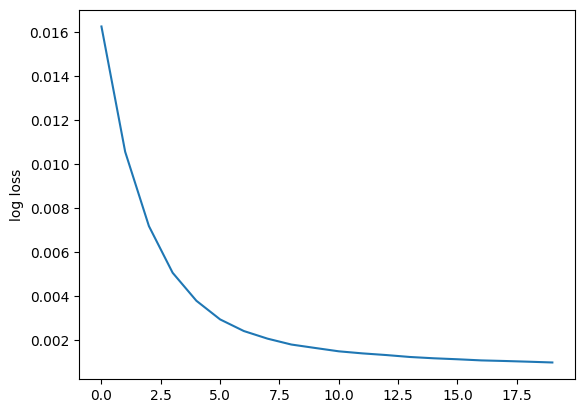

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:38<00:00, 101.29it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


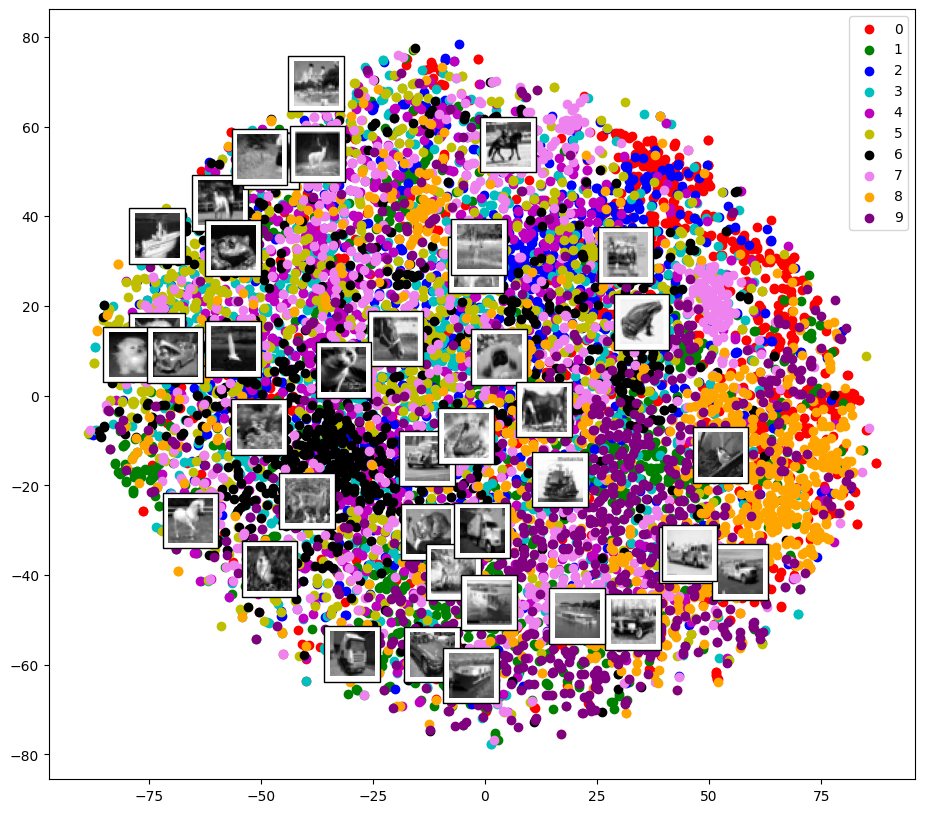

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:18<00:00, 100.22it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:39<00:00, 100.10it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.6297

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:49<00:00, 100.67it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:09<00:00, 101.14it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.295
[epoch: 2, i:   499] avg mini-batch loss: 2.262
[epoch: 3, i:   499] avg mini-batch loss: 2.165
[epoch: 4, i:   499] avg mini-batch loss: 2.064
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.297
[epoch: 2, i:   499] avg mini-batch loss: 2.282
[epoch: 3, i:   499] avg mini-batch loss: 2.224
[epoch: 4, i:   499] avg mini-batch loss: 2.123
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.290
[epoch: 2, i:   499] avg mini-batch loss: 2.240
[epoch: 3, i:   499] avg mini-batch loss: 2.154
[epoch: 4, i:   499] avg mini-batch loss: 2.069
Files already downloaded and verified


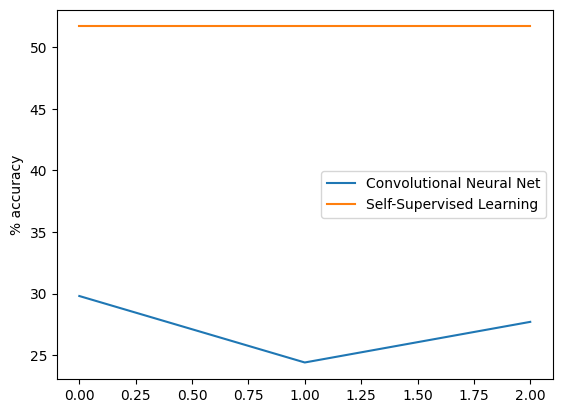

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[29.799999999999997, 24.4, 27.700000000000003]

In [21]:
svm_errors

[0.517, 0.517, 0.517]

In [22]:
conv_errors

[29.799999999999997, 24.4, 27.700000000000003]